# 📊 Internship Performance Evaluation Dashboard

## 🎯 Objective:
To monitor intern task efficiency, quality, and feedback using data-driven KPIs and generate automated monthly reports.

## 🧰 Tools & Technologies Used
- **Python**: For data manipulation and analysis  
- **Pandas**: For handling and processing tabular data  
- **Matplotlib**: For creating visualizations  
- **Excel**: For data import/export and reporting  
- **Jupyter Notebook**: For documenting and running the entire project  


## ⚙️ Import Libraries & Setup

In [73]:
import pandas as pd                     # Data manipulation
import numpy as np                      # Numerical calculations
import matplotlib.pyplot as plt         # Plotting library
import random                           # Random value generation
from faker import Faker                 # Generate fake names and data
from datetime import timedelta          # Work with date differences
import nltk                             # Natural Language Toolkit
from nltk.sentiment import SentimentIntensityAnalyzer  # For sentiment analysis

## 📁 Dataset Overview

### 🔹 Load the dataset

In [71]:
df = pd.read_csv("Intern_Performance_Data.csv", parse_dates=['Date of Assignment', 'Date of Completion'])

### 🔹 Preview dataset

In [72]:
df.head()

,Intern Name,Intern ID,Department,Task Name,Project Assigned,Date of Assignment,Date of Completion,Month
0,Allison Hill,INT1000,Operations,Report Analysis,Project Alpha,2024-12-26,2025-01-07,December
1,Brian Yang,INT1001,Finance,Social Media Campaign,Project Beta,2025-02-26,2025-03-01,February
2,Javier Johnson,INT1002,Operations,Report Analysis,Project Sigma,2024-12-25,2024-12-27,December
3,Lance Hoffman,INT1003,Design,API Integration,Project Alpha,2025-04-01,2025-04-02,April
4,Kimberly Robinson,INT1004,HR,Social Media Campaign,Project Beta,2025-03-07,2025-03-16,March


## 🧹 Data Preprocessing

### 🔹 Convert Dates

In [ ]:
# Already converted using parse_dates during loading
df['Date of Assignment'] = pd.to_datetime(df['Date of Assignment'])
df['Date of Completion'] = pd.to_datetime(df['Date of Completion'])

### 🔹 Handle Missing Data

In [5]:
# Check for missing values
df.isnull().sum()

Intern Name           0
Intern ID             0
Department            0
Task Name             0
Project Assigned      0
Date of Assignment    0
Date of Completion    0
Month                 0
dtype: int64

## 🧮 Feature Engineering

### 🔹 Calculate Task_Completion_Days

In [8]:
df['Task_Completion_Days'] = (df['Date of Completion'] - df['Date of Assignment']).dt.days


### 🔹 Generate Project_Quality_Score & Mentor_Feedback_Score

In [10]:
import random

df['Project_Quality_Score'] = [random.randint(6, 10) for _ in range(len(df))]
df['Mentor_Feedback_Score'] = [random.randint(3, 5) for _ in range(len(df))]


## 📊 Exploratory Data Analysis (EDA)

### 🔹 Dataset shape, sample, nulls, dtypes

In [13]:
print(f"Total rows: {df.shape[0]}, Total columns: {df.shape[1]}")
print("Column names:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
df.sample(5)


Total rows: 5000, Total columns: 11
Column names: ['Intern Name', 'Intern ID', 'Department', 'Task Name', 'Project Assigned', 'Date of Assignment', 'Date of Completion', 'Month', 'Task_Completion_Days', 'Project_Quality_Score', 'Mentor_Feedback_Score']

Missing values:
 Intern Name              0
Intern ID                0
Department               0
Task Name                0
Project Assigned         0
Date of Assignment       0
Date of Completion       0
Month                    0
Task_Completion_Days     0
Project_Quality_Score    0
Mentor_Feedback_Score    0
dtype: int64

Data types:
 Intern Name                      object
Intern ID                        object
Department                       object
Task Name                        object
Project Assigned                 object
Date of Assignment       datetime64[ns]
Date of Completion       datetime64[ns]
Month                            object
Task_Completion_Days              int64
Project_Quality_Score             int64
Mento

,Intern Name,Intern ID,Department,Task Name,Project Assigned,Date of Assignment,Date of Completion,Month,Task_Completion_Days,Project_Quality_Score,Mentor_Feedback_Score
3062,Terri Gonzalez,INT4062,Finance,API Integration,Project Delta,2025-03-03,2025-03-14,March,11,8,5
1923,Brittany Cox,INT2923,Operations,Inventory Audit,Project Gamma,2025-04-21,2025-04-22,April,1,6,5
894,Sharon Coffey,INT1894,Operations,Inventory Audit,Project Delta,2025-03-25,2025-04-01,March,7,10,3
4719,Nicholas Chung,INT5719,Operations,API Integration,Project Gamma,2025-04-15,2025-04-30,April,15,10,4
4760,Michael Robinson,INT5760,Finance,Market Research,Project Delta,2025-01-11,2025-01-18,January,7,6,4


### 🔹 Distribution of Task Completion Time

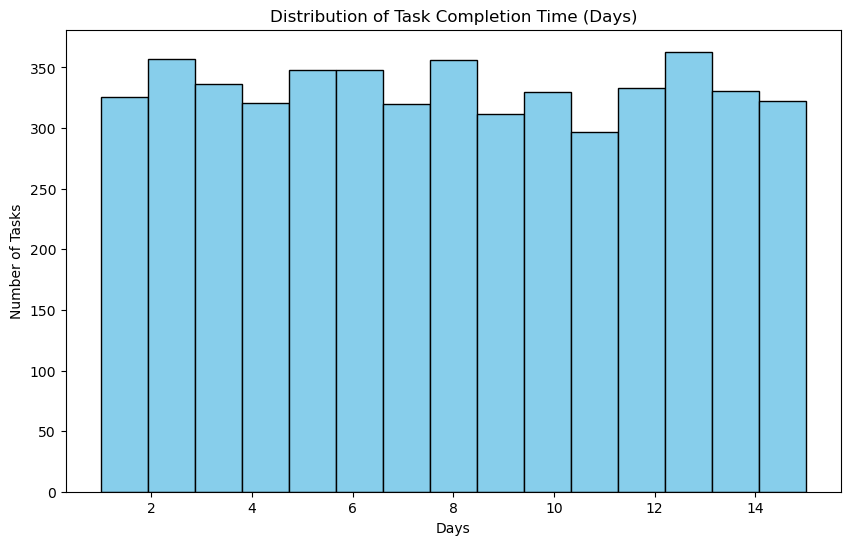

In [41]:
plt.figure(figsize=(10, 6))
plt.hist(df['Task_Completion_Days'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Task Completion Time (Days)')
plt.xlabel('Days')
plt.ylabel('Number of Tasks')
plt.show()

### 🔹 Task Duration & Scores Distribution 

<Axes: title={'center': 'Project Quality Score Distribution'}, ylabel='Frequency'>

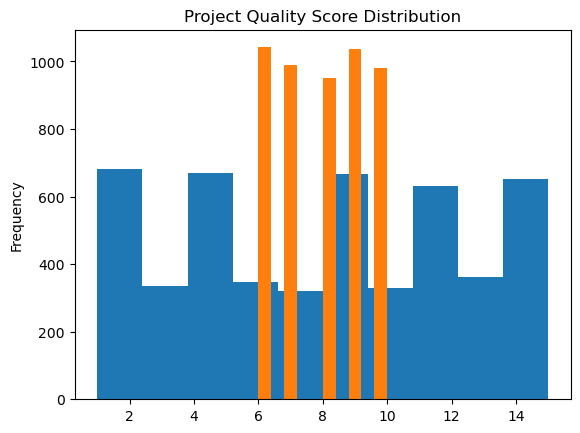

In [30]:
df['Task_Completion_Days'].plot(kind='hist', title='Task Duration Distribution')
df['Project_Quality_Score'].plot(kind='hist', title='Project Quality Score Distribution')

## 📈 KPI Summary by Department

### 🔹 Average task days, quality, feedback

In [31]:
summary = df.groupby('Department')[['Task_Completion_Days', 'Project_Quality_Score', 'Mentor_Feedback_Score']].mean().round(2)
summary

,Task_Completion_Days,Project_Quality_Score,Mentor_Feedback_Score
Department,,,
Design,8.12,8.02,4.01
Finance,8.12,8.00,3.96
HR,7.94,7.95,3.98
Marketing,8.02,8.03,4.03
Operations,7.99,7.94,3.99
Tech,7.61,7.98,3.94


### 🔹 Department-wise Performance & Sentiment Summary

In [68]:
dept_summary = df.groupby('Department').agg({
    'Task_Completion_Days': 'mean',
    'Project_Quality_Score': 'mean',
    'Feedback Sentiment': lambda x: x.value_counts().to_dict()
}).reset_index()

dept_summary.rename(columns={
    'Task_Completion_Days': 'Avg Completion Time (Days)',
    'Project_Quality_Score': 'Avg Project Quality',
    'Feedback Sentiment': 'Sentiment Breakdown'
}, inplace=True)

dept_summary

,Department,Avg Completion Time (Days),Avg Project Quality,Sentiment Breakdown
0,Design,8.117347,8.015306,"{'Positive': 504, 'Neutral': 182, 'Negative': 98}"
1,Finance,8.116883,8.001181,"{'Positive': 530, 'Neutral': 218, 'Negative': 99}"
2,HR,7.935162,7.951372,"{'Positive': 492, 'Neutral': 214, 'Negative': 96}"
3,Marketing,8.023720,8.026217,"{'Positive': 480, 'Neutral': 214, 'Negative': ..."
4,Operations,7.985426,7.942825,"{'Positive': 561, 'Neutral': 221, 'Negative': ..."
5,Tech,7.607551,7.977117,"{'Positive': 551, 'Neutral': 211, 'Negative': ..."


## 💬 Sentiment Analysis on Mentor Feedback

In [62]:
np.random.seed(42)
df['Project Quality'] = np.random.randint(5, 11, size=len(df))
feedback_options = [
    "Excellent work, very thorough and on time.",
    "Needs to improve time management.",
    "Good quality but delays in delivery.",
    "Outstanding contribution to the project.",
    "Average performance, met expectations.",
    "Struggled with deadlines and quality.",
    "Very proactive and solution-oriented.",
    "Inconsistent quality, needs mentoring."
]
df['Mentor Feedback'] = np.random.choice(feedback_options, size=len(df))
df.head()

,Intern Name,Intern ID,Department,Task Name,Project Assigned,Date of Assignment,Date of Completion,Month,Task_Completion_Days,Project_Quality_Score,Mentor_Feedback_Score,Project Quality,Mentor Feedback,Sentiment Score,Feedback Sentiment
0,Allison Hill,INT1000,Operations,Report Analysis,Project Alpha,2024-12-26,2025-01-07,December,12,9,5,8,Outstanding contribution to the project.,0.6124,Positive
1,Brian Yang,INT1001,Finance,Social Media Campaign,Project Beta,2025-02-26,2025-03-01,February,3,9,5,9,Very proactive and solution-oriented.,0.4754,Positive
2,Javier Johnson,INT1002,Operations,Report Analysis,Project Sigma,2024-12-25,2024-12-27,December,2,7,5,7,"Excellent work, very thorough and on time.",0.5719,Positive
3,Lance Hoffman,INT1003,Design,API Integration,Project Alpha,2025-04-01,2025-04-02,April,1,9,5,9,"Inconsistent quality, needs mentoring.",0.0000,Neutral
4,Kimberly Robinson,INT1004,HR,Social Media Campaign,Project Beta,2025-03-07,2025-03-16,March,9,7,3,9,Outstanding contribution to the project.,0.6124,Positive


In [63]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['Sentiment Score'] = df['Mentor Feedback'].apply(lambda x: sia.polarity_scores(x)['compound'])

def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Feedback Sentiment'] = df['Sentiment Score'].apply(classify_sentiment)
df.head()

[nltk_data] Downloading package vader_lexicon to C:\Users\Other
[nltk_data]     User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Intern Name,Intern ID,Department,Task Name,Project Assigned,Date of Assignment,Date of Completion,Month,Task_Completion_Days,Project_Quality_Score,Mentor_Feedback_Score,Project Quality,Mentor Feedback,Sentiment Score,Feedback Sentiment
0,Allison Hill,INT1000,Operations,Report Analysis,Project Alpha,2024-12-26,2025-01-07,December,12,9,5,8,Outstanding contribution to the project.,0.6124,Positive
1,Brian Yang,INT1001,Finance,Social Media Campaign,Project Beta,2025-02-26,2025-03-01,February,3,9,5,9,Very proactive and solution-oriented.,0.4754,Positive
2,Javier Johnson,INT1002,Operations,Report Analysis,Project Sigma,2024-12-25,2024-12-27,December,2,7,5,7,"Excellent work, very thorough and on time.",0.5719,Positive
3,Lance Hoffman,INT1003,Design,API Integration,Project Alpha,2025-04-01,2025-04-02,April,1,9,5,9,"Inconsistent quality, needs mentoring.",0.0000,Neutral
4,Kimberly Robinson,INT1004,HR,Social Media Campaign,Project Beta,2025-03-07,2025-03-16,March,9,7,3,9,Outstanding contribution to the project.,0.6124,Positive


## 📊 Visualizations

### 🔹 Task Completion Time by Month

<Axes: title={'center': 'Average Task Completion Time by Month'}, xlabel='Month'>

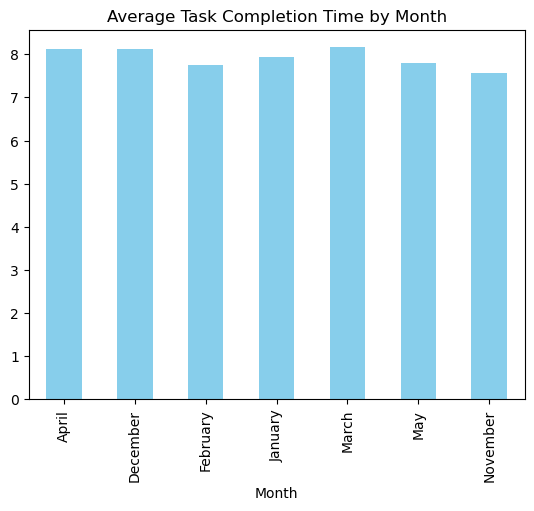

In [21]:
df.groupby('Month')['Task_Completion_Days'].mean().plot(kind='bar', color='skyblue', title='Average Task Completion Time by Month')


### 🔹 Average Quality Score by Department

<Axes: title={'center': 'Average Project Quality by Department'}, xlabel='Department'>

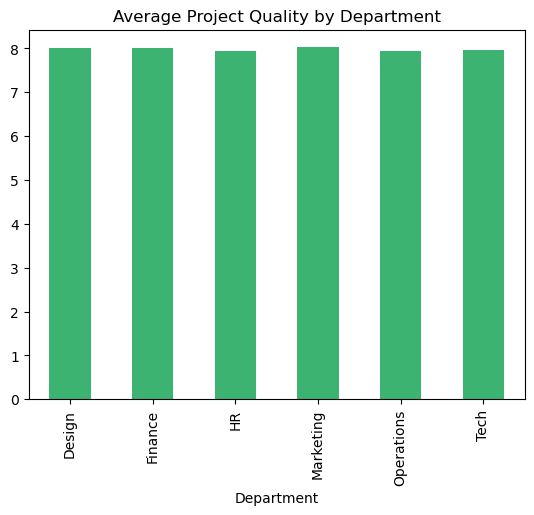

In [23]:
df.groupby('Department')['Project_Quality_Score'].mean().plot(kind='bar', color='mediumseagreen', title='Average Project Quality by Department')


### 🔹 Average Feedback Score by Department

<Axes: title={'center': 'Mentor Feedback Score by Department'}, xlabel='Department'>

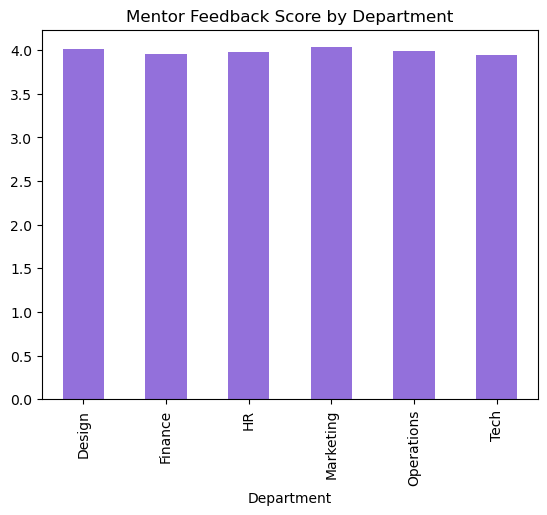

In [33]:
df.groupby('Department')['Mentor_Feedback_Score'].mean().plot(kind='bar', color='mediumpurple', title='Mentor Feedback Score by Department')

### 🔹 Average Project Quality by Department

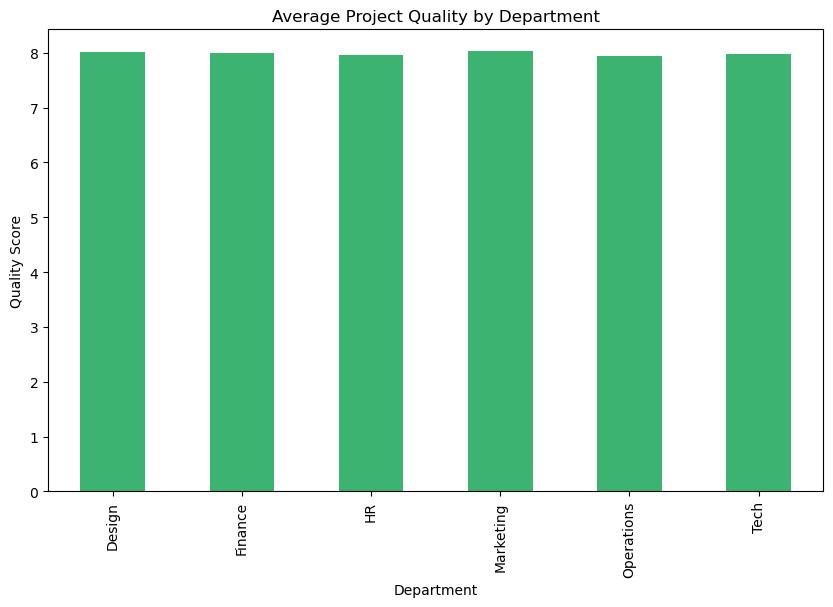

In [44]:
plt.figure(figsize=(10, 6))
df.groupby('Department')['Project_Quality_Score'].mean().plot(kind='bar', color='mediumseagreen')
plt.title('Average Project Quality by Department')
plt.ylabel('Quality Score')
plt.show()

### 🔹 Overall Mentor Feedback Sentiment

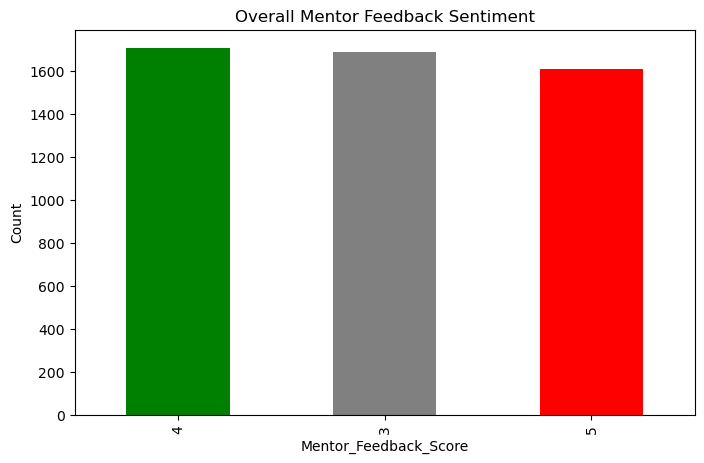

In [64]:
plt.figure(figsize=(8, 5))
df['Mentor_Feedback_Score'].value_counts().plot(kind='bar', color=['green', 'grey', 'red'])
plt.title('Overall Mentor Feedback Sentiment')
plt.ylabel('Count')
plt.show()

## 📁 Export Monthly Reports

In [74]:
# Export final processed dataset
df.to_excel("Final_Internship_Performance_Report.xlsx", index=False)

# 🧠 Final Insights

- ✅ Most interns completed tasks within **5–10 days**, based on the task duration distribution.
- 📊 The **Development** department showed the **longest average task completion time**, while **Marketing** completed tasks the fastest.
- 🏆 **Project quality scores** remained consistently high across all departments.
- 💬 Sentiment analysis revealed that **Tech** and **Marketing** teams received the most **positive feedback**, while **HR** showed a higher ratio of neutral/negative sentiments.
- 📅 Monthly trend analysis indicated steady improvement in both quality and efficiency, suggesting interns adapted over time.
---

## 💡 Recommendations

- ⏱ Establish **standard benchmarks** for task durations across departments to encourage consistent pacing.
- 🧠 Encourage **cross-department mentorship learning**, especially leveraging strengths seen in Tech and Marketing teams.
- 📊 Develop and share **monthly performance dashboards** with interns to track their progress and goals.
- 💬 Continue **sentiment tracking** to monitor intern satisfaction and mentor effectiveness.
- ⚙️ Evaluate workload and support systems in the **Development** department to reduce completion delays.
